# DEEL 2

### (a) Voer eerst een test uit voor de hypothese dat het aantal aanmeldingen een normale verdeling volgt. Wat is je conclusie? Is deze conclusie van belang voor het verder modelleren van deze variabele?

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from model_selection import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from olsdiagnostics import *

# Zet een random seed voor reproduceerbaarheid
np.random.seed(42)

# Data inlezen
college = pd.read_csv("college_statistics.csv")
college.head()

college.rename(columns={'F.Undergrad': 'F_Undergrad', 'P.Undergrad': 'P_Undergrad', 'Room.Board': 'Room_Board','S.F.Ratio': 'S_F_Ratio','perc.alumni': 'perc_alumni', 'Grad.Rate': 'Grad_Rate'}, inplace=True)
college.head(20)

college.index = np.array(college["Unnamed: 0"])
college = college.drop(columns=["Unnamed: 0"])
print(college.head())

                             Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F_Undergrad  P_Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room_Board  Books  Personal  PhD  Terminal  \
Abilene Ch

In [91]:
from scipy import stats

res_shapiro = stats.shapiro(college['Apps'])
print(res_shapiro)
res_jarque= sm.stats.jarque_bera(college['Apps'])
print(res_jarque)

ShapiroResult(statistic=np.float64(0.6540833701413009), pvalue=np.float64(6.817644464365803e-37))
(np.float64(24686.64166021783), np.float64(0.0), np.float64(3.7165574035202718), np.float64(29.59455873647677))


Conclusie : P<0.05 variabel 'Apps' heeft geen nromale verdeling. Wat belangrijk is dat de residue een normale verdeling heeft, niet per se de uitkomst van het model. 

### (b) Deel de data eerst op willekeurige manier op in een “estimation” en “test” sample. Neem 600 universiteiten in de estimation sample. Zorg ervoor dat deze opdeling reproduceerbaar is. Hint Python: gebruik functies random.seed en pandas.DataFrame.sample.


In [92]:
np.random.seed(42)
estimation_sample = college.sample(n=600, random_state=42)
# De resterende observaties vormen de test sample
test_sample = college.drop(estimation_sample.index)
print(f"Estimation sample grootte: {len(estimation_sample)}")
print(f"Test sample grootte: {len(test_sample)}")


Estimation sample grootte: 600
Test sample grootte: 177


### (c) Maak eerst een lineair model voor het aantal aanmeldingen. Gebruik hiervoor alleen de estimation sample.


In [93]:
step1 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(step1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          6.13e-163
Time:                        12:31:21   Log-Likelihood:                -5398.5
No. Observations:                 600   AIC:                         1.083e+04
Df Residuals:                     584   BIC:                         1.090e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2253.6185    871.039     -2.

### (d) Pas backward elimination toe om het aantal variabelen terug te brengen.


Ik doe het eerst handmatig. Daarna zal ik het automatsich laten doen.

In [94]:
## PhD wortd, op basis 
step2 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(step2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     123.2
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          5.42e-164
Time:                        12:31:21   Log-Likelihood:                -5398.5
No. Observations:                 600   AIC:                         1.083e+04
Df Residuals:                     585   BIC:                         1.089e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2253.8148    870.078     -2.

In [95]:
## 'Books' word als niet 
step3 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(step3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     132.9
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          4.96e-165
Time:                        12:31:21   Log-Likelihood:                -5398.6
No. Observations:                 600   AIC:                         1.083e+04
Df Residuals:                     586   BIC:                         1.089e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2183.4781    850.048     -2.

In [96]:
## 'Personal' word als niet 
step4 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(step4.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     144.1
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          4.57e-166
Time:                        12:31:22   Log-Likelihood:                -5398.7
No. Observations:                 600   AIC:                         1.082e+04
Df Residuals:                     587   BIC:                         1.088e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2336.8229    791.572     -2.

In [97]:
## 'S_F_Ratio' word als niet 
step5 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(step5.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     157.4
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          4.21e-167
Time:                        12:31:22   Log-Likelihood:                -5398.9
No. Observations:                 600   AIC:                         1.082e+04
Df Residuals:                     588   BIC:                         1.087e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2033.3488    597.370     -3.

In [98]:
## 'Top25perc' word als niet 
step6 = smf.ols(formula="Apps ~ Private + Top10perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(step6.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          5.49e-168
Time:                        12:31:22   Log-Likelihood:                -5399.5
No. Observations:                 600   AIC:                         1.082e+04
Df Residuals:                     589   BIC:                         1.087e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2180.6729    581.243     -3.

In [99]:
## 'P_Undergrad' word als niet 
step7 = smf.ols(formula="Apps ~ Private + Top10perc + F_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(step7.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     191.8
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          8.85e-169
Time:                        12:31:22   Log-Likelihood:                -5400.3
No. Observations:                 600   AIC:                         1.082e+04
Df Residuals:                     590   BIC:                         1.086e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2232.8762    580.170     -3.

AUTOMATISCHE backward elimination :

In [100]:
m = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample)
backward = backward_elimination_aic(m)
backward.summary()

Initial AIC = 10829.071133983854 

- Private[T.Yes] 10834.333060058476
- Top10perc 10832.89577157624
- Top25perc 10828.229327525127
- F_Undergrad 11244.608888745015
- P_Undergrad 10828.517267103663
- Outstate 10831.1843014069
- Room_Board 10835.177535752504
- Books 10827.216807300987
- Personal 10827.372498575685
- PhD 10827.071238731456
- Terminal 10828.582838502245
- S_F_Ratio 10827.357884008727
- perc_alumni 10833.826653717944
- Expend 10838.706821439582
- Grad_Rate 10842.26459965861
Removing PhD  AIC =  10827.071238731456 

- Private[T.Yes] 10832.437868753112
- Top10perc 10830.924019363963
- Top25perc 10826.232812018125
- F_Undergrad 11242.641475173821
- P_Undergrad 10826.523795062316
- Outstate 10829.2134398844
- Room_Board 10833.178144783986
- Books 10825.22312646761
- Personal 10825.375147678305
- Terminal 10828.227193547133
- S_F_Ratio 10825.358687265129
- perc_alumni 10831.832730466132
- Expend 10836.727732746238
- Grad_Rate 10840.337169067372
Removing Books  AIC =  10825.2231

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     191.8
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          8.85e-169
Time:                        12:31:22   Log-Likelihood:                -5400.3
No. Observations:                 600   AIC:                         1.082e+04
Df Residuals:                     590   BIC:                         1.086e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2232.8762    580.170     -3.849      0.000   -3372.327   -1093.426
Private[T.Yes]  -792.8472    286.404     -2.768      0.006   -1355.343    -230.352
Top10perc         19.9555      7.057      2.828      0.005       6.096      33.815
F_Undergrad        0.6210      0.023     26.823      0.000       0.576       0.667
Outstate           0.0821      0.040      2.075      0.038       0.004       0.160
Room_Board         0.2937      0.104      2.821      0.005       0.089       0.498
Terminal         -15.4023      7.474     -2.061      0.040     -30.082      -0.723
perc_alumni      -22.9301      8.617     -2.661      0.008     -39.854      -6.006
Expend             0.0888      0.024      3.693      0.000       0.042       0.136
Grad_Rate         26.0686      6.316      4.128      0.000      13.665      38.472
==============================================================================
Omnibus:                      912.814   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           478078.034
Skew:                           8.230   Prob(JB):                         0.00
Kurtosis:                     140.303   Cond. No.                     1.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusie uit het toepassen van het " backward_elimination_aic" : Het handmatig weghalen van PhD, Books, Personal, S_F_Ratio, Top25perc en van P_Undergrade wordt bevestigd.


### (e) Voer diverse toetsen uit om de aannamen van het lineaire model te testen.


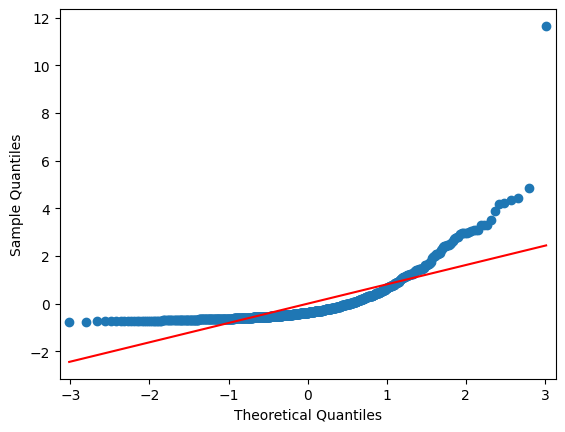

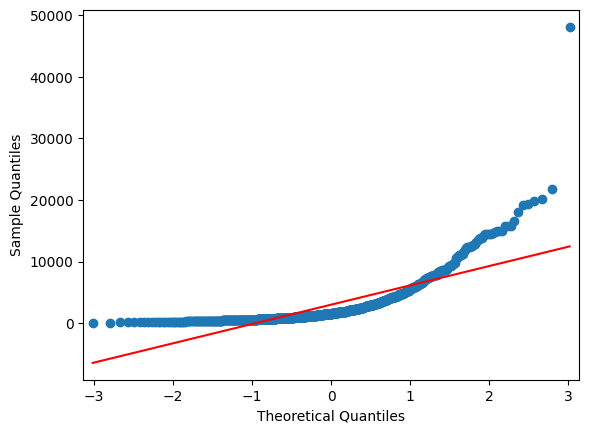

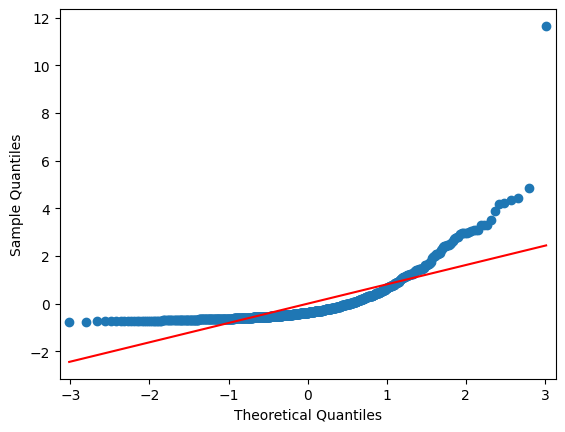

In [115]:
sm.qqplot(college.Apps, line='r') # vs original data on vertical axis
sm.qqplot(college.Apps, line='r', fit=True) # vs standardized data on vertical axis


Interpretatie : geen rechte lijn. Geen normale verdeling van Apps.

### A1 : Linearity (plot_ccpr)

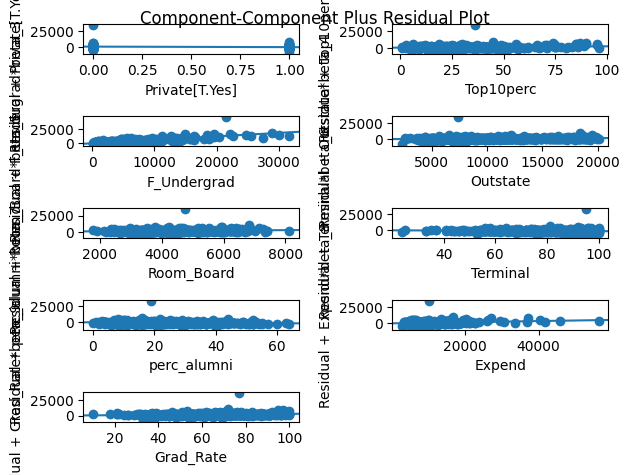

In [116]:
sm.graphics.plot_ccpr_grid(step7)
plt.show()

In [111]:
# %% RESET test
# H0: linear relation between x and y
# Ha: some non-linearity

reset = sm.stats.diagnostic.linear_reset(step7, power=2)
print(f"Reset test p-value {reset.pvalue}")


Reset test p-value 0.005973832565828086


Interpretatie RESET test : H0 is rejected, linearity is rejected.

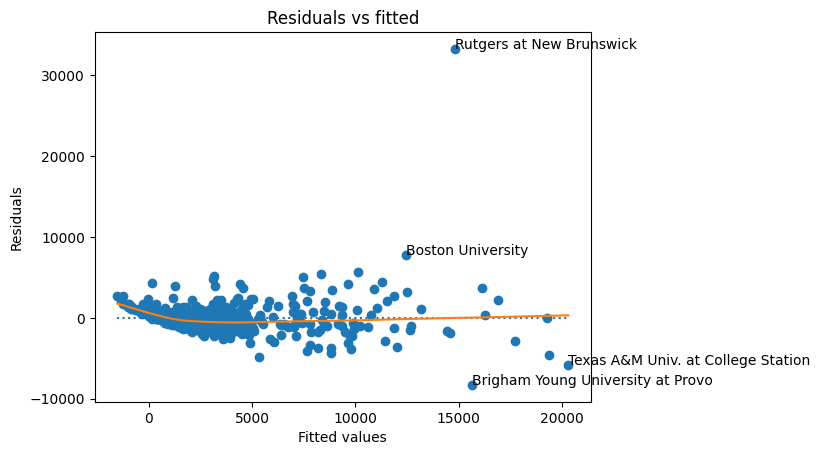

In [117]:
influence = OLSInfluence(step7)

residfitted(influence)
plt.show()


Interpretatie : 
Kromming zichtbaar bij lage fitted values, wat suggereert dat de relatie mogelijk niet helemaal lineair is. 

Uitschieters: bij "Rutgers at New Brunswick" en "Brigham Young University". 

Geen constante spreiding: De punten waaieren meer uit bij grotere fitted values. Dit wijst op heteroskedasticiteit, dus de variantie van de residuen is niet gelijk (wat je al met de Breusch-Pagan test vond).

A2 : Normality (qqresid)

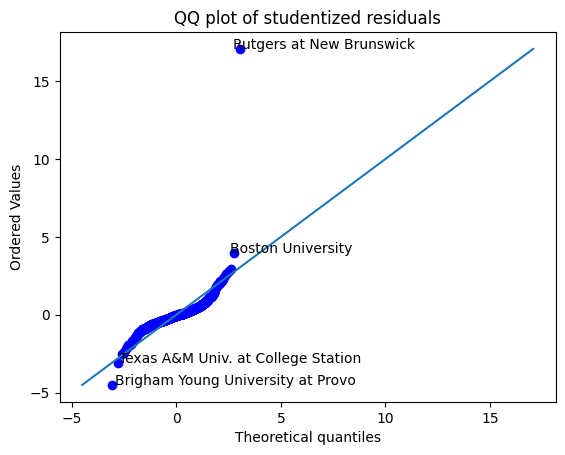

In [118]:
qqresid(influence)
plt.show()


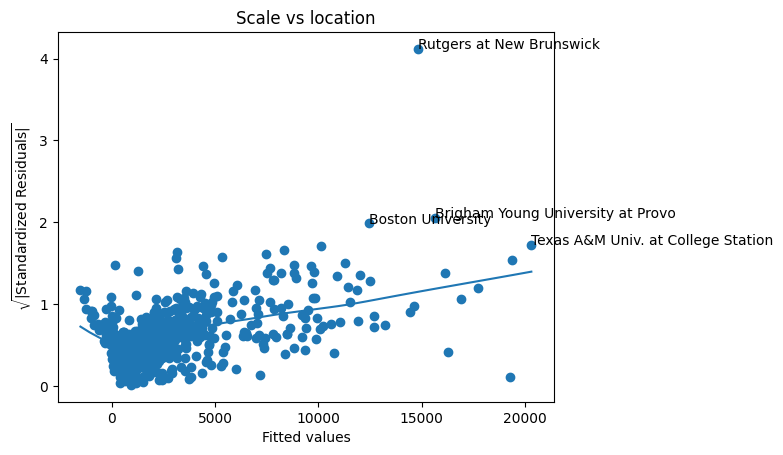

In [119]:
scalelocation(influence)
plt.show()


INTERPRETATIE : 
De blauwe punten waaieren steeds verder uit naarmate de fitted values stijgen.
De oranje lijn loopt omhoog: de variantie van de residuen wordt groter bij hogere voorspelde waardes.
=> heteroskedasticiteit

Er zijn uitschieters met hele hoge residuen, vooral voor grote fitted values.

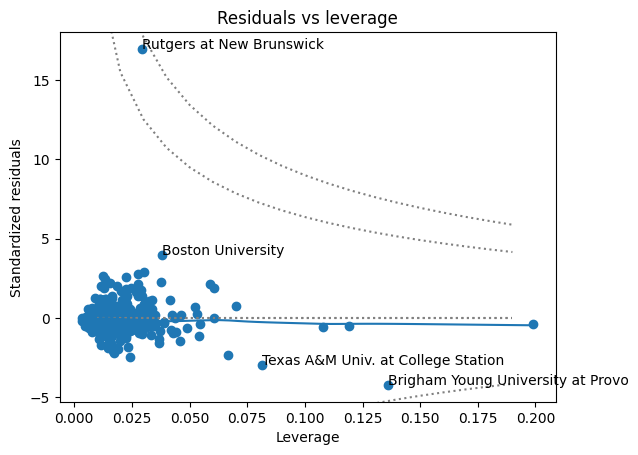

In [120]:
residleverage(influence)
plt.show()

INTERPRETATIE : Outliers lijken grote leverage te hebben.

### A4 : No autocorrelation (durbin_watson)

In [102]:
# %% Investigate independence
influence = OLSInfluence(step7)
dw = sm.stats.stattools.durbin_watson(influence.resid)
print(f"Durbin-Watson statistic {dw}")


Durbin-Watson statistic 1.9477205222535774


INTERPRETATIE : dw dichtbij 2, geen autocorrelatie. 

### A3 : Homoskedasticity (het_breuschagan)

In [103]:
# %% H0 = Homoskedasticity
bpres = sm.stats.diagnostic.het_breuschpagan(influence.resid, step7.model.data.exog)
print(bpres)
print("We need the final element:\n", bpres[3])

(np.float64(29.647065244669378), np.float64(0.0005036741805382723), np.float64(3.407591535475902), np.float64(0.0004261520081800273))
We need the final element:
 0.0004261520081800273


INTERPRETATIE : De nulhypothese is homoscedasticiteit: Omdat p-waarde < 0.05, wordt de nulhypothese verworpen : Er is sprake van heteroscedasticiteit.

In [104]:
# %% Calculate heteroskedasticity consistent standard errors
robuststderr = step7.get_robustcov_results(cov_type="HC3")
print(robuststderr.summary())


                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     69.82
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           4.82e-87
Time:                        12:31:23   Log-Likelihood:                -5400.3
No. Observations:                 600   AIC:                         1.082e+04
Df Residuals:                     590   BIC:                         1.086e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2232.8762    591.996     -3.

In [105]:
print(step7.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     191.8
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          8.85e-169
Time:                        12:31:23   Log-Likelihood:                -5400.3
No. Observations:                 600   AIC:                         1.082e+04
Df Residuals:                     590   BIC:                         1.086e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2232.8762    580.170     -3.

ATTENTION : P-value voor Private is opeens groter dan 0.05 !!!!!!!!!!!!!!!!!

### A5 : No multicollinearity (VIF)

In [106]:
# %% Multicollinearity
x = step7.model.data.exog
print("Variance Inflation Factors:")
for i in np.arange(0,x.shape[1]):
    if step7.model.exog_names[i] != 'Intercept':
        print(f"{step7.model.exog_names[i]}: {variance_inflation_factor(x, i)}")


Variance Inflation Factors:
Private[T.Yes]: 2.449177876269838
Top10perc: 2.3364767823509234
F_Undergrad: 1.8837880298900114
Outstate: 3.9506147899011057
Room_Board: 2.0036152867508754
Terminal: 1.8334352354503332
perc_alumni: 1.720225180401413
Expend: 2.5150197233059717
Grad_Rate: 1.7670668126457154


Interpretatie : Alle VIF<4, het model bevat geen multucollinearity.

### (f) Maak vervolgens een model voor de logaritme van het aantal aanmeldingen (ook weer met backward elimination).


In [125]:
log_step1 = smf.ols(formula="np.log(Apps) ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(log_step1.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     100.7
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          8.57e-151
Time:                        16:14:32   Log-Likelihood:                -502.15
No. Observations:                 600   AIC:                             1036.
Df Residuals:                     584   BIC:                             1107.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4543      0.249     17.

In [127]:
m2 = smf.ols(formula="np.log(Apps) ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample)
backward = backward_elimination_aic(m2)
backward.summary()

Initial AIC = 1036.3044989799537 

- Private[T.Yes] 1086.3896411766673
- Top10perc 1034.3166615536597
- Top25perc 1035.5957209567264
- F_Undergrad 1224.5468015071779
- P_Undergrad 1034.505027643725
- Outstate 1057.6658570784418
- Room_Board 1036.0304213296504
- Books 1041.9536028820803
- Personal 1034.8687724459708
- PhD 1038.9239149159155
- Terminal 1034.4714143430947
- S_F_Ratio 1055.2351672060831
- perc_alumni 1045.691850723725
- Expend 1049.1962142390187
- Grad_Rate 1065.510743081974
Removing Top10perc  AIC =  1034.3166615536597 

- Private[T.Yes] 1084.4315535710336
- Top25perc 1035.3798686818998
- F_Undergrad 1222.9785068507258
- P_Undergrad 1032.5279619748935
- Outstate 1055.666578738158
- Room_Board 1034.0670504039322
- Books 1039.9706029000135
- Personal 1032.8811951906157
- PhD 1036.926285682328
- Terminal 1032.4918196213582
- S_F_Ratio 1053.2377532636237
- perc_alumni 1043.7092098798234
- Expend 1049.7254317478046
- Grad_Rate 1063.5108953236945
Removing Terminal  AIC =  1032.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     151.3
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          1.76e-155
Time:                        16:40:36   Log-Likelihood:                -503.62
No. Observations:                 600   AIC:                             1029.
Df Residuals:                     589   BIC:                             1078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.6165      0.213     21.639      0.000       4.197       5.035
Private[T.Yes]    -0.6065      0.083     -7.308      0.000      -0.769      -0.443
Top25perc          0.0026      0.002      1.590      0.112      -0.001       0.006
F_Undergrad        0.0001   6.74e-06     16.889      0.000       0.000       0.000
Outstate         6.05e-05   1.04e-05      5.795      0.000       4e-05     8.1e-05
Books              0.0005      0.000      3.191      0.001       0.000       0.001
PhD                0.0074      0.002      3.744      0.000       0.004       0.011
S_F_Ratio          0.0353      0.008      4.478      0.000       0.020       0.051
perc_alumni       -0.0090      0.002     -3.689      0.000      -0.014      -0.004
Expend          3.045e-05   6.97e-06      4.370      0.000    1.68e-05    4.41e-05
Grad_Rate          0.0104      0.002      5.766      0.000       0.007       0.014
==============================================================================
Omnibus:                       19.782   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.257
Skew:                          -0.307   Prob(JB):                     1.21e-06
Kurtosis:                       3.845   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
# Model obv backward elimination
log_step = smf.ols(formula="np.log(Apps) ~ Private + Top25perc + F_Undergrad + Outstate + Books + PhD + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(log_step.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     151.3
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          1.76e-155
Time:                        16:43:02   Log-Likelihood:                -503.62
No. Observations:                 600   AIC:                             1029.
Df Residuals:                     589   BIC:                             1078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.6165      0.213     21.

### (g) Voer opnieuw de diverse toetsen uit om de aannamen van het model te testen.


### A1 : Linearity (plot_ccpr)

In [129]:
# %% RESET test
# H0: linear relation between x and y
# Ha: some non-linearity

reset = sm.stats.diagnostic.linear_reset(log_step, power=2)
print(f"Reset test p-value {reset.pvalue}")

Reset test p-value 9.739024578974703e-20


Interpretatie RESET test : H0 is ????????, linearity is rejected.

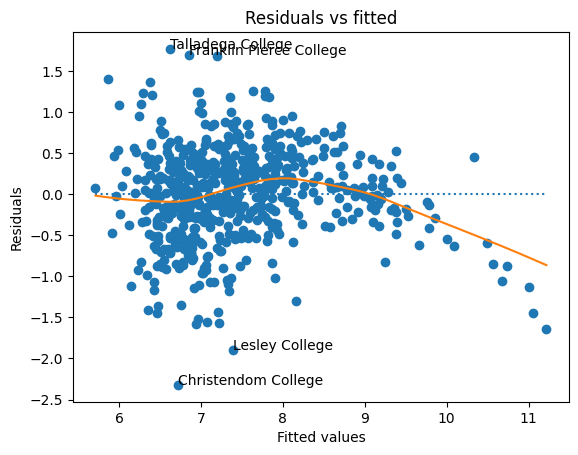

In [130]:
influence2 = OLSInfluence(log_step)

residfitted(influence2)
plt.show()


A2 : Normality (qqresid)

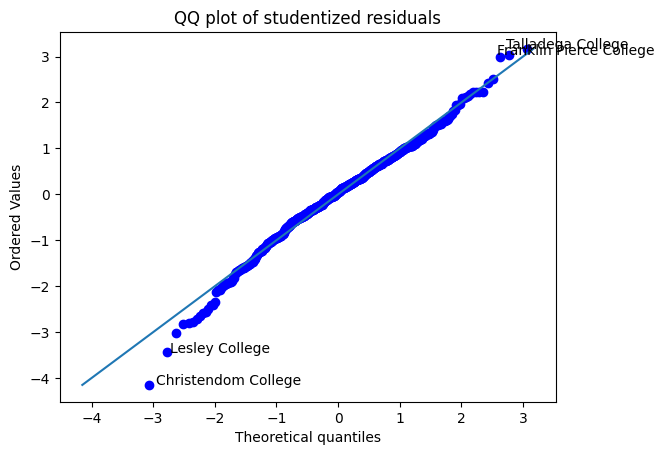

In [131]:
qqresid(influence2)
plt.show()


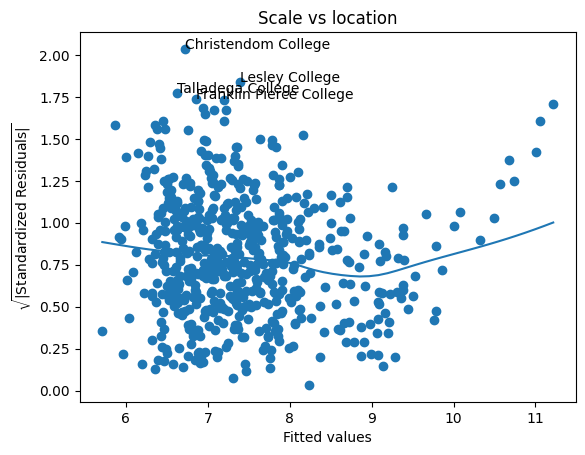

In [132]:
scalelocation(influence2)
plt.show()


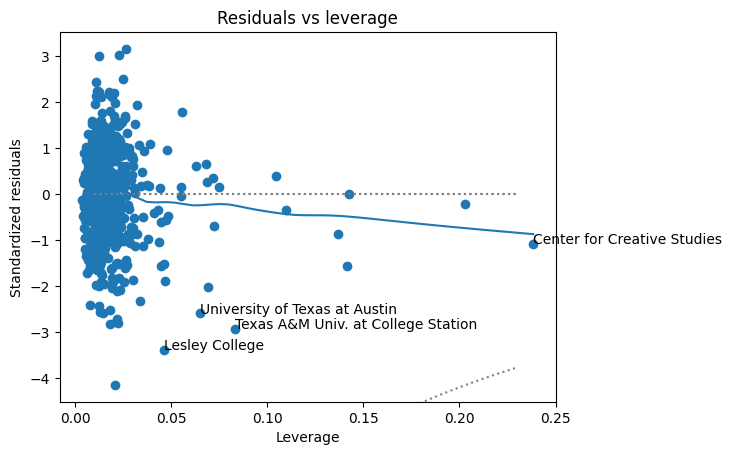

In [133]:
residleverage(influence2)
plt.show()

### A4 : No autocorrelation (durbin_watson)

In [134]:
# %% Investigate independence

dw2 = sm.stats.stattools.durbin_watson(influence2.resid)
print(f"Durbin-Watson statistic {dw2}")


Durbin-Watson statistic 1.9333083705600456


### A3 : Homoskedasticity (het_breuschagan)

In [135]:
# %% H0 = Homoskedasticity
bpres2 = sm.stats.diagnostic.het_breuschpagan(influence2.resid, log_step.model.data.exog)
print(bpres2)
print("We need the final element:\n", bpres2[3])

(np.float64(17.853893370055584), np.float64(0.05747883731862496), np.float64(1.806409606660387), np.float64(0.056449878882555815))
We need the final element:
 0.056449878882555815


### A5 : No multicollinearity (VIF)

In [136]:
# %% Multicollinearity
x2 = log_step.model.data.exog
print("Variance Inflation Factors:")
for i in np.arange(0,x2.shape[1]):
    if log_step.model.exog_names[i] != 'Intercept':
        print(f"{log_step.model.exog_names[i]}: {variance_inflation_factor(x2, i)}")


Variance Inflation Factors:
Private[T.Yes]: 2.518465865582575
Top25perc: 2.019753769708445
F_Undergrad: 1.9568875606976788
Outstate: 3.3725891671910393
Books: 1.0584770803368275
PhD: 1.9124085816675593
S_F_Ratio: 1.86619982840038
perc_alumni: 1.6754956943225163
Expend: 2.586635394521006
Grad_Rate: 1.764166085974945


### (h) Welk van de twee modellen heeft de voorkeur, en waarom?


### (i) Probeer het gekozen model nog verder te verbeteren: denk aan het toevoegen van transformaties van verklarende variabelen.


In [145]:
estimation_sample['Top10perc_sq'] = estimation_sample['Top10perc']**2
estimation_sample['F_Undergrad_sq'] = estimation_sample['F_Undergrad']**2
estimation_sample['S_F_Ratio_sq'] = estimation_sample['S_F_Ratio']**2
estimation_sample['log_Expend'] = np.log(estimation_sample['Expend']+1)
estimation_sample['log_F_Undergrad'] = np.log(estimation_sample['F_Undergrad']+1)

formula = (
    "np.log(Apps) ~ Private + Top25perc + F_Undergrad + Outstate + Books + PhD + "
    "S_F_Ratio + perc_alumni + Grad_Rate + "
    "Top10perc + Top10perc_sq + F_Undergrad_sq + S_F_Ratio_sq + log_Expend + log_F_Undergrad"
)

improved_model = smf.ols(formula=formula, data=estimation_sample).fit()


In [146]:
print("---- Ori.gineel model ----")
print(log_step.summary())


---- Ori.gineel model ----
                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     151.3
Date:                Thu, 09 Oct 2025   Prob (F-statistic):          1.76e-155
Time:                        21:45:13   Log-Likelihood:                -503.62
No. Observations:                 600   AIC:                             1029.
Df Residuals:                     589   BIC:                             1078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        

In [143]:

print("\n---- Verbeterd model ----")
print(improved_model.summary())


---- Verbeterd model ----
                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     248.7
Date:                Thu, 09 Oct 2025   Prob (F-statistic):          5.82e-242
Time:                        21:38:30   Log-Likelihood:                -285.27
No. Observations:                 600   AIC:                             602.5
Df Residuals:                     584   BIC:                             672.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept      

In [148]:
formula = (
    "np.log(Apps) ~ Private + Top25perc + F_Undergrad + Outstate + Books + PhD + "
    "S_F_Ratio + perc_alumni + Grad_Rate + "
    "Top10perc + Top10perc_sq + F_Undergrad_sq + S_F_Ratio_sq + log_Expend + log_F_Undergrad"
)

m3 = smf.ols(formula=formula, data=estimation_sample)
backward = backward_elimination_aic(m3)
backward.summary()

Initial AIC = 602.5427423875635 

- Private[T.Yes] 600.7928687839924
- Top25perc 602.0574619348997
- F_Undergrad 601.7374284278737
- Outstate 622.1647316580015
- Books 602.250086113587
- PhD 604.1312498961056
- S_F_Ratio 607.4608827452605
- perc_alumni 600.5928556809633
- Grad_Rate 612.586383503002
- Top10perc 606.1465962457803
- Top10perc_sq 611.1475948045559
- F_Undergrad_sq 600.9537749397848
- S_F_Ratio_sq 607.298958095809
- log_Expend 606.6637082624177
- log_F_Undergrad 858.177918521832
Removing perc_alumni  AIC =  600.5928556809633 

- Private[T.Yes] 598.8448728122439
- Top25perc 600.1791962506531
- F_Undergrad 599.8059332987957
- Outstate 621.0619198783481
- Books 600.2847819878655
- PhD 602.2472209833129
- S_F_Ratio 605.5454915595467
- Grad_Rate 611.4555211291233
- Top10perc 604.2252937023547
- Top10perc_sq 609.26182999765
- F_Undergrad_sq 599.0233107714732
- S_F_Ratio_sq 605.3928760295241
- log_Expend 604.7547060513718
- log_F_Undergrad 858.2493100630982
Removing Private[T.Yes]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     373.2
Date:                Thu, 09 Oct 2025   Prob (F-statistic):          2.43e-247
Time:                        21:48:06   Log-Likelihood:                -287.42
No. Observations:                 600   AIC:                             596.8
Df Residuals:                     589   BIC:                             645.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.1102      0.846     -3.675      0.000      -4.772      -1.448
F_Undergrad     -1.084e-05   6.97e-06     -1.555      0.121   -2.45e-05    2.85e-06
Outstate          3.56e-05   7.28e-06      4.890      0.000    2.13e-05    4.99e-05
PhD                 0.0027      0.001      1.889      0.059      -0.000       0.005
S_F_Ratio           0.0520      0.019      2.764      0.006       0.015       0.089
Grad_Rate           0.0046      0.001      3.698      0.000       0.002       0.007
Top10perc          -0.0074      0.003     -2.237      0.026      -0.014      -0.001
Top10perc_sq        0.0001   3.69e-05      3.145      0.002    4.36e-05       0.000
S_F_Ratio_sq       -0.0014      0.001     -2.685      0.007      -0.002      -0.000
log_Expend          0.2283      0.088      2.599      0.010       0.056       0.401
log_F_Undergrad     0.9544      0.034     27.761      0.000       0.887       1.022
==============================================================================
Omnibus:                       58.543   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.562
Skew:                           0.058   Prob(JB):                     2.77e-77
Kurtosis:                       6.754   Cond. No.                     6.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

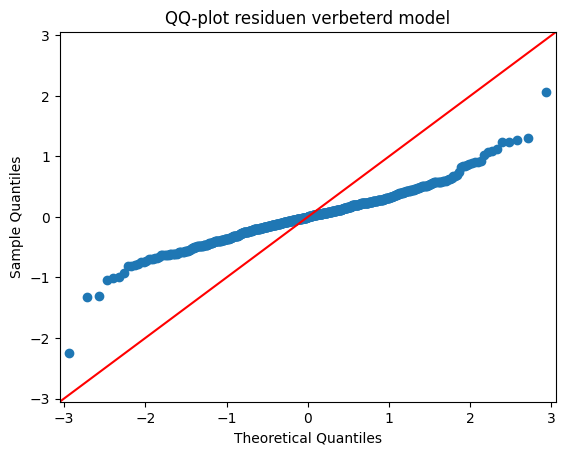

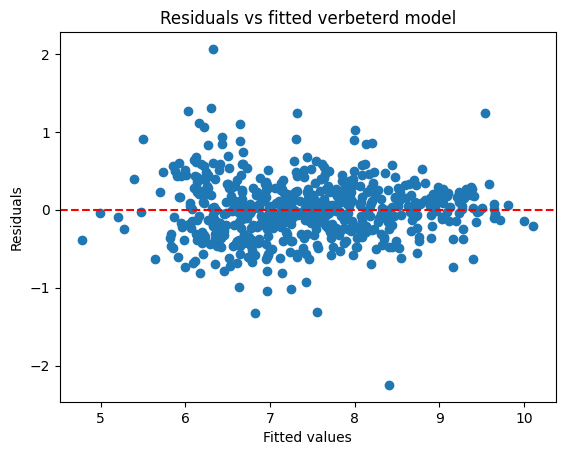

RESET-test p-value: 0.002595129692173336
AIC (oud): 1029.2392077011637
AIC (nieuw): 602.5427423875635


In [149]:
# Residuals plots:
sm.qqplot(improved_model.resid, line='45')
plt.title("QQ-plot residuen verbeterd model")
plt.show()

plt.scatter(improved_model.fittedvalues, improved_model.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted verbeterd model")
plt.axhline(0, color="red", linestyle="--")
plt.show()

# RESET-test, indicatie voor lineair vs niet-lineair nogmaals
reset = sm.stats.diagnostic.linear_reset(improved_model, power=2)
print("RESET-test p-value:", reset.pvalue)

# AIC/BIC vergelijken:
print("AIC (oud):", log_step.aic)
print("AIC (nieuw):", improved_model.aic)

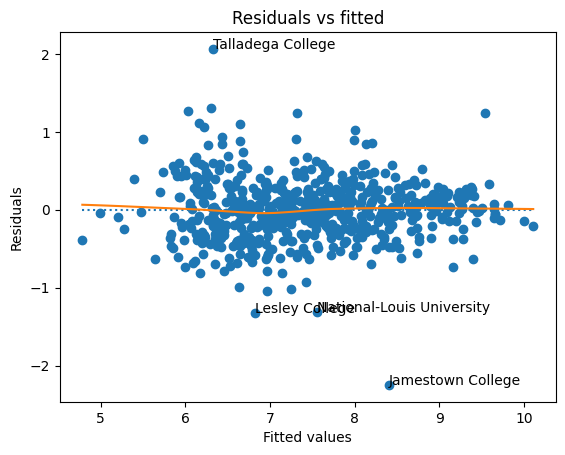

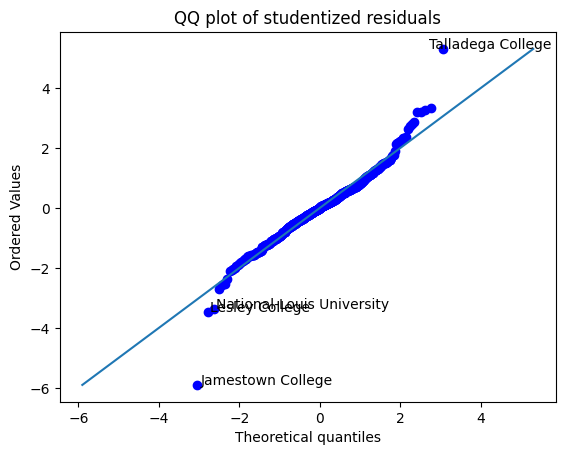

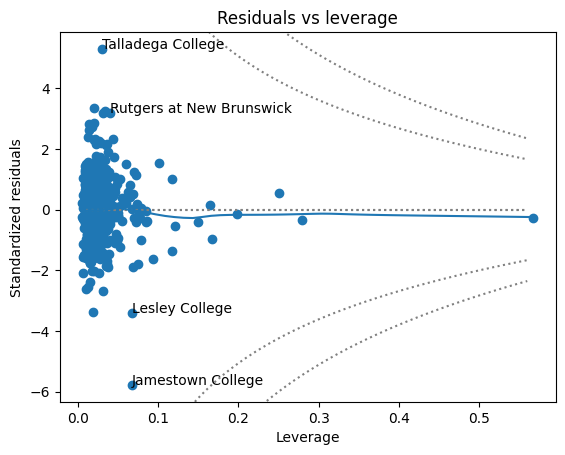

In [151]:
influence3 = OLSInfluence(improved_model)

residfitted(influence3)
plt.show()
qqresid(influence3)
plt.show()
residleverage(influence3)
plt.show()

In [156]:
formula2 = (
    "np.log(Apps) ~ Outstate + PhD + "
    "S_F_Ratio + Grad_Rate + "
    "Top10perc + Top10perc_sq + S_F_Ratio_sq + log_Expend + log_F_Undergrad"
)

improved_model2 = smf.ols(formula=formula2, data=estimation_sample).fit()
print("\n---- Verbeterd model ----")
print(improved_model2.summary())



---- Verbeterd model ----
                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     413.4
Date:                Thu, 09 Oct 2025   Prob (F-statistic):          3.87e-248
Time:                        22:28:42   Log-Likelihood:                -288.65
No. Observations:                 600   AIC:                             597.3
Df Residuals:                     590   BIC:                             641.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept      

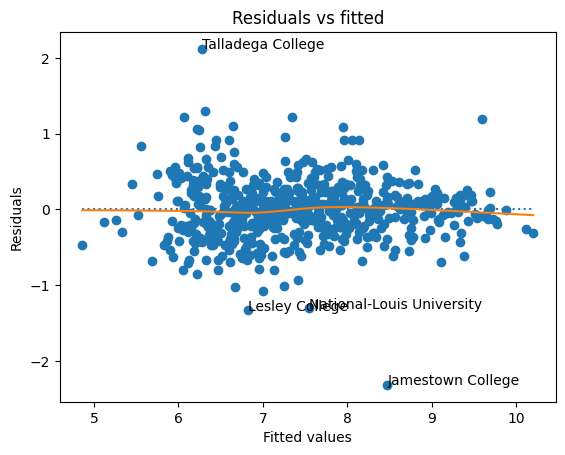

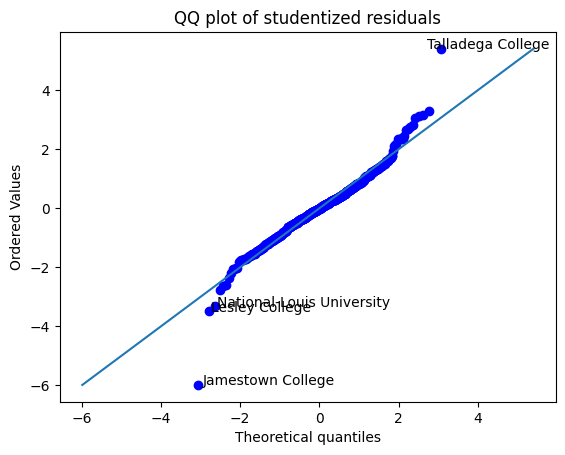

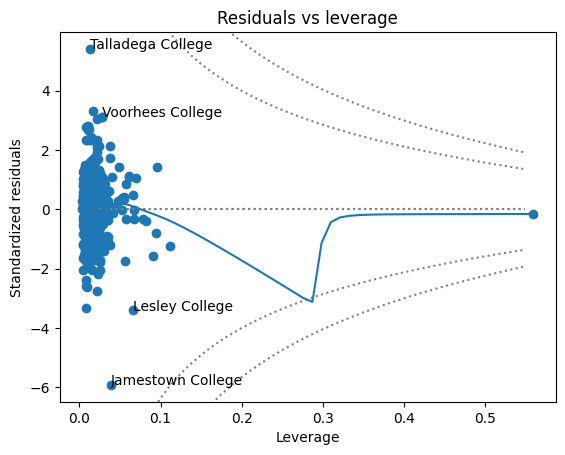

In [157]:
influence4 = OLSInfluence(improved_model2)

residfitted(influence4)
plt.show()
qqresid(influence4)
plt.show()
residleverage(influence4)
plt.show()

### (j) Hoe interpreteer je de co¨effici¨enten in het model dat je uiteindelijk hebt gevon￾den? Wees hierbij heel precies. Welke factoren zijn uiteindelijk het meest van belang?


### (k) Gebruik het uiteindelijke model om voorspellingen te maken voor de waarne￾mingen in de estimation en de test sample.


### (l) Vergelijk de voorspelkracht (mbv. mean squared error) van het model op de estimation sample met die op de test sample. Wat concludeer je?